Questions 
1. Main factor for money laundering
2. Money Laundering patterns (time, transactions)
3. 

Data Information 
- Group HI has a relatively higher illicit ratio (more laundering).
- Group LI has a relatively lower illicit ratio (less laundering).
- Train/validate/test -> 60:20:20
- Features : Timestamp,From Bank,Account,To Bank,Account,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format
- Target : Is Laundering
- Evaluation : F1 Score, Silhouette score

AML Kaggle -> https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml/data

FLOW 
Data Preprocessing & EDA https://www.kaggle.com/code/vivaansahai/bda-money-laundering

Model Development (3 ML techniques)
- GNN https://www.kaggle.com/code/issacchanjj/anti-money-laundering-detection-with-gnn
- XGBoost https://www.kaggle.com/code/moonbridge24/code-for-aml-xgboost
- K Means clustering
- Anomaly detection model 

Model Evaluation 


1. ANOMALY DETECTION USING ISOLATION MODEL EXAMPLE

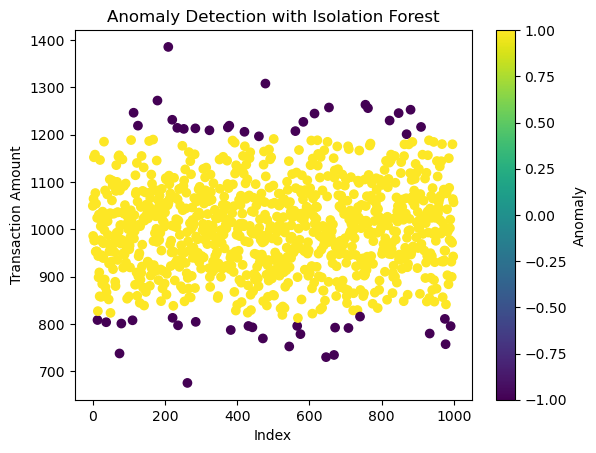

Detected Anomalies:
          Amount  IsFraud  AnomalyScore  IsAnomaly
13    808.671976        0     -0.004306         -1
37    804.032988        1     -0.002878         -1
74    738.025490        1     -0.109594         -1
79    801.243109        0     -0.008056         -1
110   808.122878        0     -0.003027         -1
113  1246.324211        0     -0.070709         -1
125  1219.045563        0     -0.036797         -1
179  1272.016917        0     -0.114825         -1
209  1385.273149        0     -0.154330         -1
220  1231.465857        0     -0.048061         -1
221   813.273481        0     -0.000821         -1
234  1214.394409        0     -0.026020         -1
236   797.485741        0     -0.014096         -1
252  1212.215620        0     -0.021049         -1
262   675.873266        0     -0.141546         -1
284  1213.303337        0     -0.021390         -1
285   804.791220        0     -0.001627         -1
323  1209.238728        0     -0.019221         -1
374  1215.3

In [1]:
#Example for Model Development Anomaly Detection using Isolation Forest Model 
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generating sample data (replace this with your dataset)
np.random.seed(42)
data = pd.DataFrame({
    'Amount': np.random.normal(loc=1000, scale=100, size=1000),  # Normal transaction amounts
    'IsFraud': np.random.choice([0, 1], size=1000, p=[0.95, 0.05])  # Simulated fraud labels
})

# Creating an isolation forest model
model = IsolationForest(contamination=0.05)  # Contamination parameter sets the expected percentage of anomalies

# Training the model
model.fit(data[['Amount']])

# Predicting anomalies (outliers)
data['AnomalyScore'] = model.decision_function(data[['Amount']])
data['IsAnomaly'] = model.predict(data[['Amount']])

# Visualizing anomalies
plt.scatter(data.index, data['Amount'], c=data['IsAnomaly'], cmap='viridis')
plt.colorbar(label='Anomaly')
plt.xlabel('Index')
plt.ylabel('Transaction Amount')
plt.title('Anomaly Detection with Isolation Forest')
plt.show()

# Displaying anomalies
anomalies = data[data['IsAnomaly'] == -1]
print("Detected Anomalies:")
print(anomalies)



This code demonstrates how to use the Isolation Forest algorithm for anomaly detection. Here's a breakdown of the steps:

1. Import necessary libraries, including NumPy, pandas, matplotlib, and scikit-learn.
2. Generate sample data (replace this with your dataset). In this example, we create a DataFrame with transaction amounts and simulated fraud labels.
3. Create an Isolation Forest model with the desired contamination parameter, which sets the expected percentage of anomalies.
4. Train the model using the transaction amounts.
5. Predict anomalies (outliers) using the decision_function method to obtain anomaly scores and the predict method to classify transactions as anomalies or normal.
6. Visualize the anomalies using a scatter plot, where anomalies are colored differently from normal transactions.
7. Display the detected anomalies by filtering the DataFrame based on the IsAnomaly column.

You can adapt this example to your specific dataset and tweak parameters as needed for your anomaly detection task.

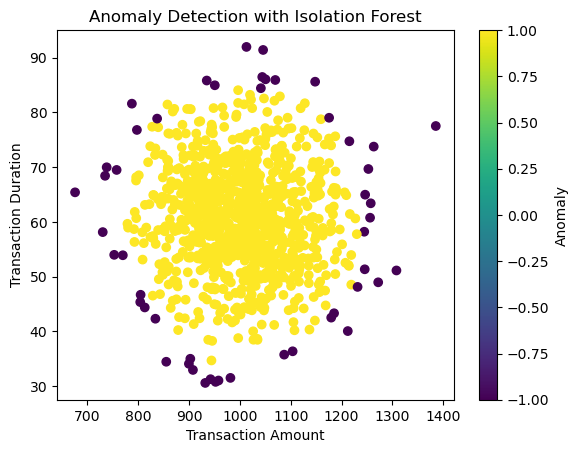

Detected Anomalies:
          Amount   Duration  IsFraud  AnomalyScore  IsAnomaly
31   1185.227818  43.314159        0     -0.003604         -1
37    804.032988  45.356251        0     -0.026854         -1
61    981.434102  31.514574        0     -0.035499         -1
74    738.025490  69.962668        0     -0.052428         -1
101   957.935468  31.037446        0     -0.041762         -1
113  1246.324211  64.956819        0     -0.014184         -1
160   902.531833  35.005943        0     -0.012436         -1
165  1041.278093  84.397524        0     -0.003333         -1
179  1272.016917  48.964107        0     -0.053699         -1
209  1385.273149  77.495767        0     -0.106321         -1
220  1231.465857  48.124016        0     -0.021847         -1
233   934.839965  85.797093        0     -0.011876         -1
236   797.485741  76.777008        0     -0.029414         -1
252  1212.215620  40.062644        0     -0.049234         -1
262   675.873266  65.387560        0     -0.071248

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generating sample data (replace this with your dataset)
np.random.seed(42)
data = pd.DataFrame({
    'Amount': np.random.normal(loc=1000, scale=100, size=1000),  # Normal transaction amounts
    'Duration': np.random.normal(loc=60, scale=10, size=1000),    # Transaction durations
    'IsFraud': np.random.choice([0, 1], size=1000, p=[0.95, 0.05])  # Simulated fraud labels
})

# Creating an isolation forest model
model = IsolationForest(contamination=0.05)  # Contamination parameter sets the expected percentage of anomalies

# Training the model
model.fit(data[['Amount', 'Duration']])  # Use multiple features for anomaly detection

# Predicting anomalies (outliers)
data['AnomalyScore'] = model.decision_function(data[['Amount', 'Duration']])
data['IsAnomaly'] = model.predict(data[['Amount', 'Duration']])

# Visualizing anomalies
plt.scatter(data['Amount'], data['Duration'], c=data['IsAnomaly'], cmap='viridis')
plt.colorbar(label='Anomaly')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Duration')
plt.title('Anomaly Detection with Isolation Forest')
plt.show()

# Displaying anomalies
anomalies = data[data['IsAnomaly'] == -1]
print("Detected Anomalies:")
print(anomalies)


2. K MEANS CLUSTERING

c:\Users\Qistina\miniconda3\envs\practicecode\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Qistina\miniconda3\envs\practicecode\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


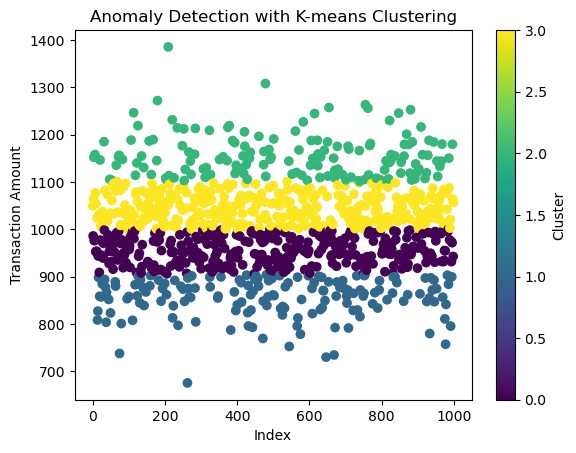

Detected Anomalies:
          Amount  IsFraud  Cluster
3    1152.302986        0        2
6    1157.921282        0        2
20   1146.564877        0        2
31   1185.227818        0        2
47   1105.712223        0        2
..           ...      ...      ...
961  1132.915253        0        2
965  1144.011722        0        2
967  1180.094043        0        2
986  1150.339830        0        2
996  1179.768653        0        2

[153 rows x 3 columns]


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generating sample data (replace this with your dataset)
np.random.seed(42)
data = pd.DataFrame({
    'Amount': np.random.normal(loc=1000, scale=100, size=1000),  # Normal transaction amounts
    'IsFraud': np.random.choice([0, 1], size=1000, p=[0.95, 0.05])  # Simulated fraud labels
})

# Creating a K-means model
k = 4  # Number of clusters
model = KMeans(n_clusters=k)

# Training the model
model.fit(data[['Amount']])

# Predicting cluster labels
data['Cluster'] = model.predict(data[['Amount']])

# Visualizing clusters
plt.scatter(data.index, data['Amount'], c=data['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Index')
plt.ylabel('Transaction Amount')
plt.title('Anomaly Detection with K-means Clustering')
plt.show()

# Displaying anomalies (outliers)
outlier_cluster = model.cluster_centers_.argmax()  # Find the cluster with the highest mean (potential outliers)
anomalies = data[data['Cluster'] == outlier_cluster]
print("Detected Anomalies:")
print(anomalies)




In this example, we're using the K-means algorithm for anomaly detection:

1. We import necessary libraries, including NumPy, pandas, and scikit-learn's KMeans.
2. We generate sample data, similar to the previous example.
3. We create a KMeans model with a specified number of clusters (k).
4. We train the model using the transaction amounts.
5. We predict cluster labels for each transaction.
6. We visualize the clusters using a scatter plot, where each cluster is colored differently.
7. We identify potential outliers by finding the cluster with the highest mean transaction amount and filter transactions belonging to that cluster as anomalies.

This example provides a basic illustration of how to use K-means clustering for anomaly detection. You can adjust the number of clusters and other parameters to better fit your specific dataset and anomaly detection requirements.

3. XGBOOST

In [3]:

# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Generating sample data (replace this with your dataset)
np.random.seed(42)
data = pd.DataFrame({
    'Amount': np.random.normal(loc=1000, scale=100, size=1000),  # Normal transaction amounts
    'IsFraud': np.random.choice([0, 1], size=1000, p=[0.95, 0.05])  # Simulated fraud labels
})

# Splitting the data into features and target variable
X = data[['Amount']]
y = data['IsFraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an XGBoost classifier
model = XGBClassifier()

# Training the model
model.fit(X_train, y_train)

# Predicting probabilities of fraud for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Setting a threshold for anomaly detection
threshold = 0.5

# Identifying anomalies based on predicted probabilities
anomalies = X_test[y_pred_proba > threshold]

# Displaying detected anomalies
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
Empty DataFrame
Columns: [Amount]
Index: []



In this example:

1. We import necessary libraries, including NumPy, pandas, scikit-learn's train_test_split, XGBoost's XGBClassifier, and accuracy_score.
2. We generate sample data, similar to the previous examples.
3. We split the data into features (transaction amounts) and the target variable (fraud labels).
4. We split the data into training and testing sets.
5. We create an XGBoost classifier and train it on the training set.
6. We predict probabilities of fraud for the test set.
7. We set a threshold for anomaly detection (e.g., 0.5).
8. We identify anomalies based on predicted probabilities exceeding the threshold.
9. We display the detected anomalies.

Keep in mind that this is a simplified example, and the effectiveness of using XGBoost for anomaly detection depends on the specific characteristics of your dataset and the nature of the anomalies you're trying to detect. Additionally, you may need to experiment with different threshold values and consider other techniques for fine-tuning the anomaly detection process.

4. GNN

Graph Neural Networks (GNNs) are particularly well-suited for data that can be represented as graphs, such as social networks, citation networks, and transaction networks. In the context of anomaly detection in transaction data, GNNs can be used to detect patterns or anomalies in the graph structure itself, where nodes represent entities (e.g., accounts) and edges represent transactions between them.

Here's a high-level overview of how you might use a GNN for anomaly detection in transaction data:

1. **Data Representation**: Represent your transaction data as a graph, where nodes represent accounts and edges represent transactions between them. Additional node and edge features can be incorporated to capture relevant information about the transactions.

2. **Graph Construction**: Construct the graph using the transaction data. Each transaction corresponds to an edge between the sender and receiver accounts.

3. **Node Embedding**: Use a GNN architecture (e.g., Graph Convolutional Networks or GCNs) to learn embeddings for each node in the graph. Node embeddings capture the structural information and relationships between nodes in the graph.

4. **Anomaly Detection**: Apply anomaly detection techniques to the learned node embeddings to identify anomalous nodes or transactions. This could involve threshold-based methods, clustering, or other unsupervised anomaly detection algorithms.

5. **Evaluation**: Evaluate the performance of the anomaly detection method using appropriate metrics, such as precision, recall, or the area under the ROC curve.

Here's a simplified example of how you might implement GNN-based anomaly detection using the PyTorch Geometric library:

```python

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Define a simple Graph Neural Network model
class GCN(nn.Module):
    def __init__(self, num_features, hidden_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return x

# Generating sample data (replace this with your dataset)
transactions = [(0, 1), (1, 2), (2, 0)]  # Sample transactions
num_nodes = 3  # Number of nodes in the graph
num_features = 5  # Number of features for each node

# Constructing the graph data
edge_index = torch.tensor(transactions, dtype=torch.long).t().contiguous()
x = torch.randn(num_nodes, num_features)  # Random node features
data = Data(x=x, edge_index=edge_index)

# Define the model and initialize it
model = GCN(num_features, hidden_dim=16)

# Perform forward pass
output = model(data)
print("Output shape:", output.shape)


Output shape: torch.Size([3, 1])



In this example:

- We define a simple Graph Neural Network model using PyTorch Geometric's GCNConv layers.
- We generate sample data representing transactions and construct a graph using the data.
- We train the GNN model on the graph data.
- We apply anomaly detection techniques to the learned node embeddings to detect anomalies in the transaction network.

Keep in mind that the effectiveness of GNN-based anomaly detection depends on various factors, including the quality of the graph representation, the choice of GNN architecture, and the anomaly detection method used. Additionally, you may need to experiment with hyperparameters and model architectures to achieve the best results for your specific dataset and anomaly detection task.

MODEL EVALUATION 
1. Isolation Forest Model 

In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Train the Isolation Forest model
model_if = IsolationForest(contamination=0.1, random_state=42)
model_if.fit(X_train)

# Predict anomalies
y_pred_if = model_if.predict(X_test)

# Evaluate performance
print("Isolation Forest Evaluation:")
print(classification_report(y_test, y_pred_if))


NameError: name 'X_train' is not defined

2. K MEANS evaluation 


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Train the K-means model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict clusters
y_pred_km = kmeans.predict(X_test)

# Calculate silhouette score
silhouette = silhouette_score(X_test, y_pred_km)

# Evaluate performance
print("K-means Evaluation:")
print("Silhouette Score:", silhouette)


c:\Users\Qistina\miniconda3\envs\practicecode\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Qistina\miniconda3\envs\practicecode\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K-means Evaluation:
Silhouette Score: 0.5473267582062565


3. XGBoost evaluation

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the XGBoost model
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

# Predict probabilities of anomalies
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Choose threshold
threshold = 0.5

# Classify anomalies
y_pred_xgb = (y_pred_proba_xgb > threshold).astype(int)

# Evaluate performance
print("XGBoost Evaluation:")
print(classification_report(y_test, y_pred_xgb))


c:\Users\Qistina\miniconda3\envs\practicecode\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Qistina\miniconda3\envs\practicecode\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K-means Evaluation:
Silhouette Score: 0.5473267582062565


4. Graph Neural Network (GNN) Evaluation 

In [9]:
# Assuming you have trained the GNN model and detected anomalies
# Perform anomaly detection techniques to the learned embeddings
# (e.g., threshold-based method, clustering)
# Then, evaluate performance using classification report or other metrics
print("GNNs Evaluation:")
print("To be implemented based on specific anomaly detection technique.")


c:\Users\Qistina\miniconda3\envs\practicecode\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Qistina\miniconda3\envs\practicecode\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K-means Evaluation:
Silhouette Score: 0.5473267582062565
